In [57]:
using LinearAlgebra, Plots

#function to remove multiple elements from a list
function PopMul(list,rem) #rem = which elements to remove
    rem=sort(rem, rev=true) #ordering is important when removing elements from list, could be done elsewere
    for r in rem
       splice!(list,r) 
    end
    list
end
;

#function to convert a binary list [0,1,1,0,1] to a decimal number
function BinDec(bin)
    dec=0
    for i in 1:length(bin)
        dec+=bin[i]*2^(i-1)
    end
    dec
end
;

We want to determine the entanglement entropy of a state $|\phi>$ of the form $$|\phi>=\sum_{l=0}^{2^N}c_l|l>,$$ where N is the number of particles and l labels the basis states of the Hilbert space.

The density matrix is of the form $$\rho_{\phi}=\sum_{l,l'}c_lc_{l'}^*|l><l'|$$

In our case, $|l>$ is represented by e.g. $|011010>$. We can devide it into subsystems A and B, where A is for example the first half of the system and B the second: $$|011010>=|011>\otimes|010>.$$

We want to be able to choose our subsystem. This will be the input of the reduced density function, together with the state. We choose to make the imput a list: e.g. {1,3,5} will mean the subsystem has the first, third and fifth particle.

In the lecture we saw that for a state written in terms of A eigenvectors ${\alpha}$ and B eigenvectors $\beta$ $$|\phi>=\sum_{\alpha}\sum_{\beta}\phi_{\alpha\beta}|\alpha>\otimes|\beta>,$$ the reduced density operator $\hat{\rho}_A$ has, in the A eigenspace, matrix elements as follows: 

$$
\rho_{A,ij}=\sum_{k=1}^{2^{dim_B}}\phi_{ik}\phi_{jk}.
$$

Once this reduced density matrix has been obtained, it is easy to compute the entanglement entropy:
$$
S_A = \sum_{\alpha} w_{\alpha}\log{w_{\alpha}}
$$
where $w_{\alpha}$ are the eigenvalues of the reduced density matrix.

In [151]:
function RedDens(state,subsys) #computes the reduced density matrix
    
    N=Int64(log(2,length(state))) #number of particles
    Na=length(subsys) #number of particles in subsystem A
    prod = zeros(Float64,2^Na, 2^(N-Na)) #matrix with coef. of the product state
    for l in 1:length(state)
        lbin=digits(l-1, base = 2, pad = N)
        abin=lbin[subsys] #finding the state of A within l
        bbin=PopMul(lbin,subsys) #finding the state of B within l
        prod[BinDec(abin)+1,BinDec(bbin)+1]=state[l]
    end
    redDM = zeros(Float64,2^Na,2^Na) #initializes the reduced density matrix
    for i in 1:2^Na
        for j in 1:2^Na
            redDM[i,j]=dot(prod[i,:],prod[j,:])
        end
    end
    redDM
    
end

RedDens (generic function with 1 method)

In [162]:
function EntEntr(state,subsys) #determines the entanglement entropy
    
    #=if length(subsys) == 0
        return 0
    end=#
    redDM = RedDens(state,subsys)
    eigv = eigvals(redDM)
    entropy = 0
    for w in eigv
        if w > 1e-20
            entropy -= w*log(w)
        end
    end
    entropy
end

EntEntr (generic function with 1 method)

We now want to test the function in different cases. First a `random state':

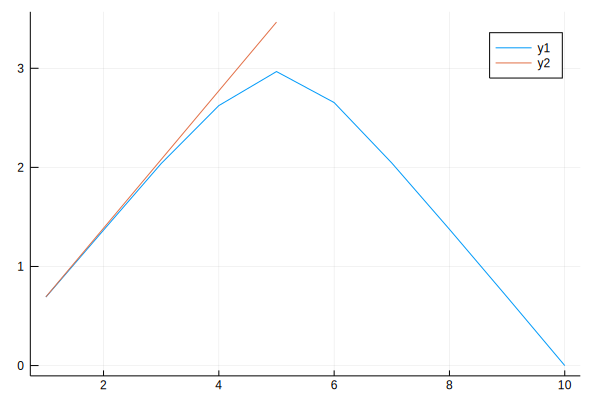

In [173]:
N = 10 #particle number
randNr = 2*rand(2^N).-1 #random numbers in the range [-1,1]
randState = normalize(randNr)
data = Array{Float32}(undef, N)
for i in 1:N
    data[i] = EntEntr(randState,collect(1:i))
end
plot([data,[n*log(2) for n in 1:5]])

In [170]:
[n*log(2) for n in 1:5]

5-element Array{Float64,1}:
 0.6931471805599453
 1.3862943611198906
 2.0794415416798357
 2.772588722239781 
 3.4657359027997265